In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the excel file
df = pd.read_excel('/content/drive/MyDrive/attacks_data.xlsx')

In [3]:
df.head()

,slug,event_date,year,month,actor,actor_type,organization,industry_code,industry,motive,event_type,event_subtype,description,source_url,country,actor_country
0,1f72c2eb8ab303e4,2014-01-01,2014,1,Undetermined,Criminal,Barry University,61,Educational Services,Undetermined,Exploitive,Exploitation of End Hosts,Barry University notifies patients of its Foot...,https://www.beckershospitalreview.com/healthca...,United States of America,Undetermined
1,ecac8b3e60a2f72f,2014-01-01,2014,1,Undetermined,Criminal,Record Assist LLC,54,"Professional, Scientific, and Technical Services",Undetermined,Exploitive,Exploitation of Application Server,Record Assist LLC notifies of an unauthorized ...,https://privacyrights.org/data-breaches/record...,United States of America,Undetermined
2,3bbe0695e2d019f3,2014-01-01,2014,1,Syrian Electronic Army,Hacktivist,Skype's Social Media,54,"Professional, Scientific, and Technical Services",Protest,Disruptive,Message Manipulation,The Syrian Electronic Army hacks Skype's Twitt...,http://thenextweb.com/microsoft/2014/01/01/sky...,United States of America,Syrian Arab Republic
3,6100014f6ca84b3d,2014-01-02,2014,1,Undetermined,Criminal,Snapchat,51,Information,Undetermined,Exploitive,Exploitation of Application Server,Greyhat hackers publish the partial phone numb...,http://arstechnica.com/security/2014/01/greyha...,United States of America,Undetermined
4,3a94b8cf6dde1f66,2014-01-03,2014,1,DERP Trolling,Undetermined,Battle.net,51,Information,Undetermined,Disruptive,External Denial of Service,"The servers for Steam, Origin, Battle.net, and...",http://arstechnica.com/gaming/2014/01/multiple...,United States of America,Undetermined


In [4]:
#print the column names and their data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   slug           13841 non-null  object
 1   event_date     13841 non-null  object
 2   year           13841 non-null  int64 
 3   month          13841 non-null  int64 
 4   actor          13841 non-null  object
 5   actor_type     13841 non-null  object
 6   organization   13841 non-null  object
 7   industry_code  13841 non-null  int64 
 8   industry       13841 non-null  object
 9   motive         13841 non-null  object
 10  event_type     13841 non-null  object
 11  event_subtype  13821 non-null  object
 12  description    13839 non-null  object
 13  source_url     13837 non-null  object
 14  country        13841 non-null  object
 15  actor_country  13836 non-null  object
dtypes: int64(3), object(13)
memory usage: 1.7+ MB
None


In [5]:
#Check for missing values
print(df.isnull().sum())

slug              0
event_date        0
year              0
month             0
actor             0
actor_type        0
organization      0
industry_code     0
industry          0
motive            0
event_type        0
event_subtype    20
description       2
source_url        4
country           0
actor_country     5
dtype: int64


In [6]:
#handle missing values
data = df.copy()

#Replace missing values using dictionary-based approach for multiple columns
data.fillna({
    'event_subtype': 'Unknown',
    'description': '',
    'source_url': 'Unavailable',
    'actor_country': 'Unknown'
}, inplace=True)

#Verify missing values are handled
print(data.isnull().sum())


slug             0
event_date       0
year             0
month            0
actor            0
actor_type       0
organization     0
industry_code    0
industry         0
motive           0
event_type       0
event_subtype    0
description      0
source_url       0
country          0
actor_country    0
dtype: int64


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   slug           13841 non-null  object
 1   event_date     13841 non-null  object
 2   year           13841 non-null  int64 
 3   month          13841 non-null  int64 
 4   actor          13841 non-null  object
 5   actor_type     13841 non-null  object
 6   organization   13841 non-null  object
 7   industry_code  13841 non-null  int64 
 8   industry       13841 non-null  object
 9   motive         13841 non-null  object
 10  event_type     13841 non-null  object
 11  event_subtype  13841 non-null  object
 12  description    13841 non-null  object
 13  source_url     13841 non-null  object
 14  country        13841 non-null  object
 15  actor_country  13841 non-null  object
dtypes: int64(3), object(13)
memory usage: 1.7+ MB
None


In [8]:
#Convert event_date from object to datetime
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

#Verify data types after conversion
print(data.dtypes)


slug                     object
event_date       datetime64[ns]
year                      int64
month                     int64
actor                    object
actor_type               object
organization             object
industry_code             int64
industry                 object
motive                   object
event_type               object
event_subtype            object
description              object
source_url               object
country                  object
actor_country            object
dtype: object


In [9]:
#Check for any invalid dates (NaT)
invalid_dates = data[data['event_date'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")

#Verify the cleaned DataFrame
print(data.info())


Number of invalid dates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   slug           13841 non-null  object        
 1   event_date     13841 non-null  datetime64[ns]
 2   year           13841 non-null  int64         
 3   month          13841 non-null  int64         
 4   actor          13841 non-null  object        
 5   actor_type     13841 non-null  object        
 6   organization   13841 non-null  object        
 7   industry_code  13841 non-null  int64         
 8   industry       13841 non-null  object        
 9   motive         13841 non-null  object        
 10  event_type     13841 non-null  object        
 11  event_subtype  13841 non-null  object        
 12  description    13841 non-null  object        
 13  source_url     13841 non-null  object        
 14  country        13841 non-null  object      

In [10]:
unique_actor = data['actor'].unique()
print("Unique Actor:")
print(list(unique_actor))

unique_actor_types = data['actor_type'].unique()
print("Unique Actor Types:")
print(list(unique_actor_types))

unique_industry = data['industry'].unique()
print("Unique Industry:")
print(list(unique_industry))

unique_event_types = data['event_type'].unique()
print("Unique Event Types:")
print(list(unique_event_types))

unique_countries = data['actor_country'].unique()
print("Unique Countries:")
print(list(unique_countries))

unique_actor_countries = data['actor_country'].unique()
print("Unique Actor Countries:")
print(list(unique_actor_countries))

Unique Actor:
['Undetermined', 'Syrian Electronic Army', 'DERP Trolling', 'Pakiz Cyber Squad', 'Evil Shadow Team', 'HitlerSec', 'Mr.Xhat', 'ObeySec', 'H4x0r HuSsY', 'Anonymous', 'RedHack', 'TeaM MaDLeeTs', 'Hmei7; SultanHaikal', 'TurkGuvenligi', 'TeamBerserk', 'Sultan Haikal; Gantengers Crew', 'Islamic Cyber Resistance', 'Anti-Armenia Team', 'Ashik Iqbal Chy', 'H4$N4!N H4XOR', 'Nigerian Cyber Army', 'NullCrew', 'National Security Agency', 'Ukranian Svoboda Party', 'Pinoy Anonymouz', 'MaXiMiZerS', 'Pakistan Haxors Crew', 'Huawei', 'Dr.SHA6H', 'Dr.3v1l', 'TheHorsemen', 'Anti WMD Team', 'Ethical Spectrum', 'Anonymous (Syria)', '@G3NTbl4ck', 'DeleteSec', 'nairb', 'Anonymous (Ukraine)', 'LulzSec (Peru)', '@th3inf1d3l', 'Zcompany Hacking Crew', 'Turkish Ajan', '@security_511', 'Eugene Belford', 'Gantengers Crew', 'Mormoroth', '@Rucyborg', 'Two Students', 'Russian Cyber Command', 'Team Cyber Criminals', 'HAMAS', 'SEO', 'Anonymous (Ecuador)', 'AnonGhost', 'Shmook Amer; Dr.Hjd', 'YMH', 'Mark Ns

In [11]:
corrections = {
    'Hacktvist': 'Hacktivist',
}

#Replace the values in the actor_type column
data['actor_type'] = data['actor_type'].replace(corrections)

#Verify the changes
unique_actor_types_after = data['actor_type'].unique()
print("\nUnique Actor Types After Corrections:")
print(unique_actor_types_after)


Unique Actor Types After Corrections:
['Criminal' 'Hacktivist' 'Undetermined' 'Hobbyist' 'Nation-State'
 'Terrorist']


In [12]:
from scipy import stats

#Function to detect and return indices of outliers using Z-scores
def detect_outliers_z_score(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > 3)
    return outliers[0]

#Detect outliers for 'year', 'month', and 'industry_code'
outliers_year = detect_outliers_z_score(data, 'year')
outliers_month = detect_outliers_z_score(data, 'month')
outliers_industry_code = detect_outliers_z_score(data, 'industry_code')

#Display results
print(f"Outliers in 'year': {outliers_year}")
print(f"Outliers in 'month': {outliers_month}")
print(f"Outliers in 'industry_code': {outliers_industry_code}")



Outliers in 'year': []
Outliers in 'month': []
Outliers in 'industry_code': []


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Initialize the scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

#Apply Standardization (mean=0, std=1) to 'year' and 'industry_code'
data[['year_std', 'industry_code_std']] = scaler_standard.fit_transform(data[['year', 'industry_code']])

#Apply Normalization (range [0,1]) to 'month'
data[['month_norm']] = scaler_minmax.fit_transform(data[['month']])

#Display the first few rows to verify the transformations
print(data[['year_std', 'industry_code_std', 'month_norm']].head())


   year_std  industry_code_std  month_norm
0 -2.044911          -0.118740         0.0
1 -2.044911          -0.488929         0.0
2 -2.044911          -0.488929         0.0
3 -2.044911          -0.647581         0.0
4 -2.044911          -0.647581         0.0


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   slug               13841 non-null  object        
 1   event_date         13841 non-null  datetime64[ns]
 2   year               13841 non-null  int64         
 3   month              13841 non-null  int64         
 4   actor              13841 non-null  object        
 5   actor_type         13841 non-null  object        
 6   organization       13841 non-null  object        
 7   industry_code      13841 non-null  int64         
 8   industry           13841 non-null  object        
 9   motive             13841 non-null  object        
 10  event_type         13841 non-null  object        
 11  event_subtype      13841 non-null  object        
 12  description        13841 non-null  object        
 13  source_url         13841 non-null  object        
 14  countr

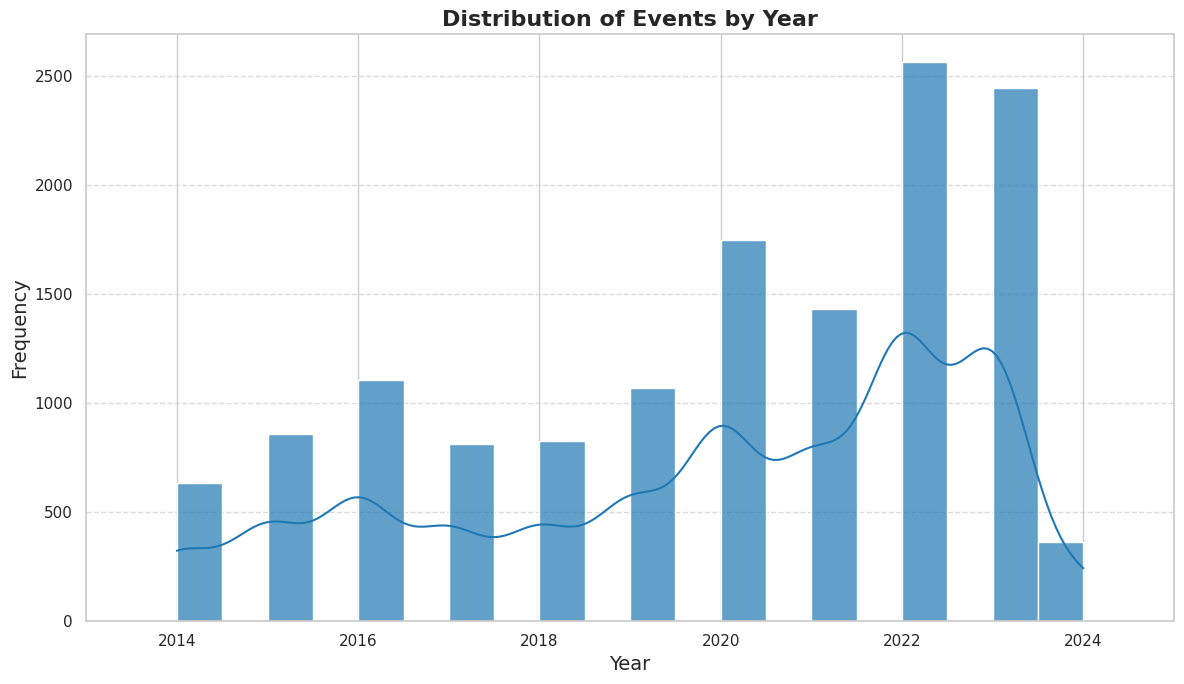

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

plt.figure(figsize=(12, 7))

#Histogram for year
sns.histplot(data['year'], bins=20, kde=True, color=palette[1], alpha=0.7)
plt.title('Distribution of Events by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(data['year'].min() - 1, data['year'].max() + 1)
plt.tight_layout()
plt.show()


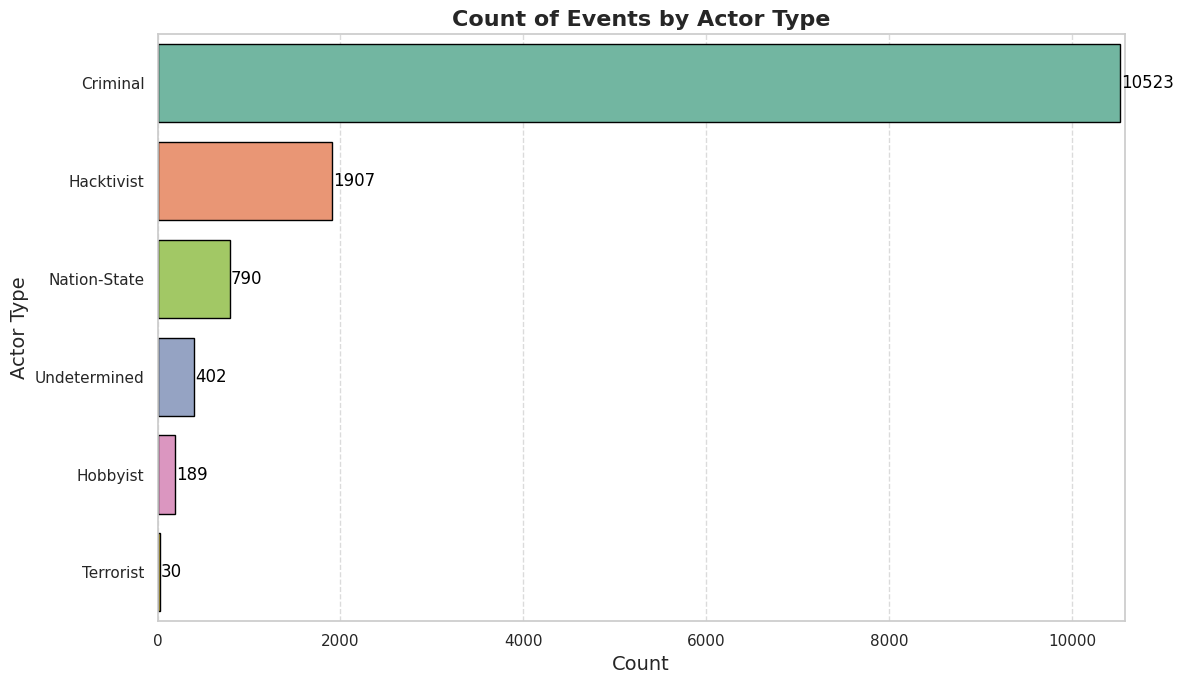

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

#Bar chart for actor type
sns.countplot(y='actor_type', data=data, order=data['actor_type'].value_counts().index,
               palette='Set2', edgecolor='black', hue='actor_type', legend=False)

plt.title('Count of Events by Actor Type', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Actor Type', fontsize=14)

for index, value in enumerate(data['actor_type'].value_counts()):
    plt.text(value + 10, index, str(value), fontsize=12, color='black', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, data['actor_type'].value_counts().max() + 50)

plt.tight_layout()
plt.show()


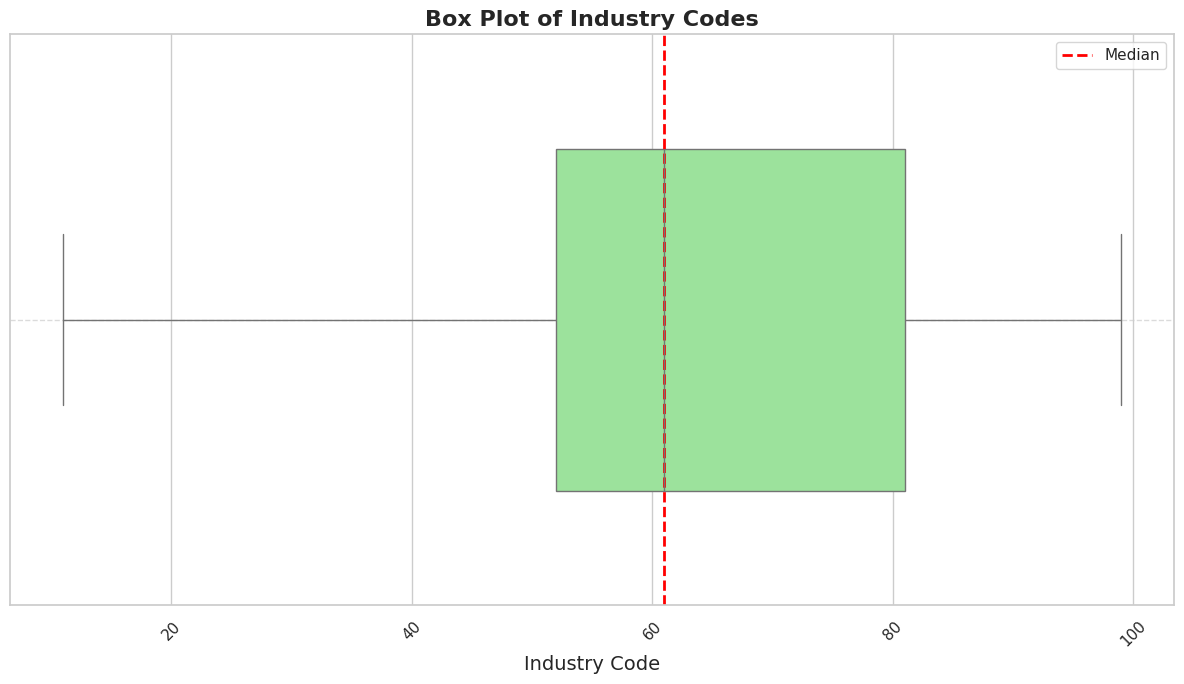

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

#Box plot for industry code
sns.boxplot(x='industry_code', data=data, color='lightgreen', width=0.6, fliersize=5)

plt.title('Box Plot of Industry Codes', fontsize=16, fontweight='bold')
plt.xlabel('Industry Code', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

median_value = data['industry_code'].median()
plt.axvline(median_value, color='red', linestyle='--', label='Median', linewidth=2)

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


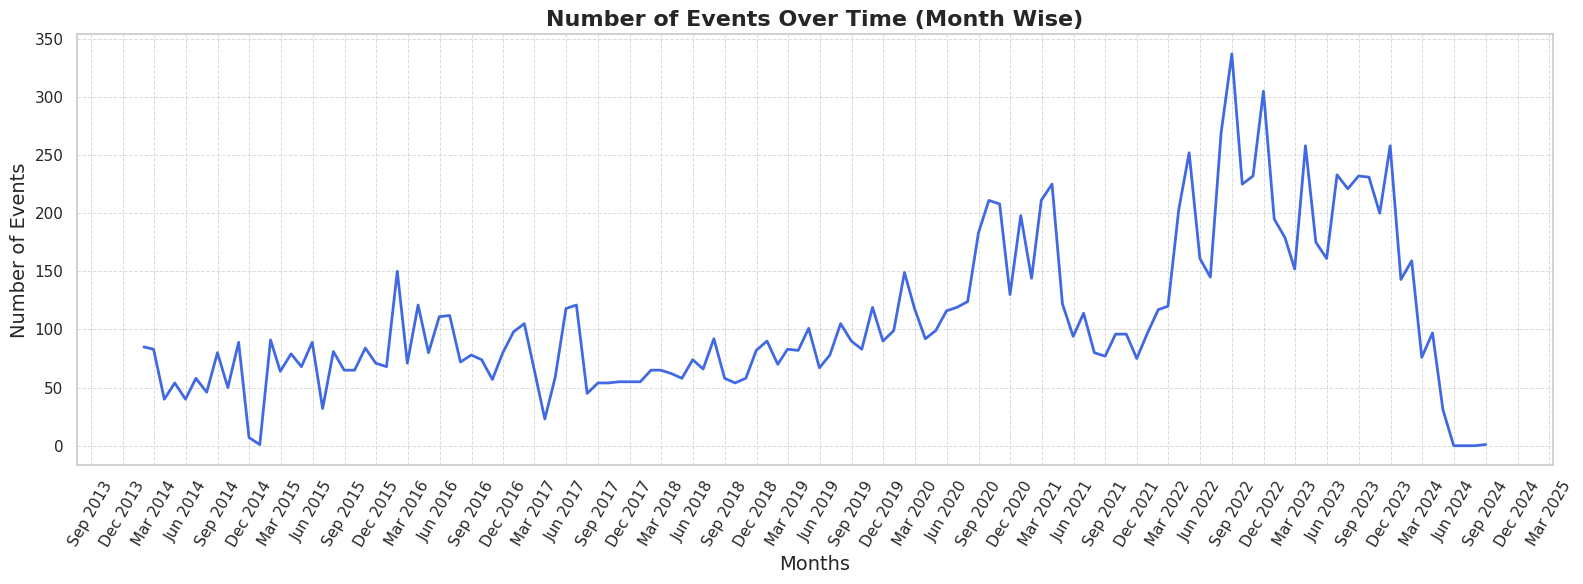

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set(style="whitegrid")

monthly_events = data.set_index('event_date').resample('ME').size()

plt.figure(figsize=(16, 6))

#Plot the time series data
plt.plot(monthly_events.index, monthly_events, linestyle='-', color='royalblue', linewidth=2, markersize=5)

plt.title('Number of Events Over Time (Month Wise)', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)

plt.xticks(rotation=60)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


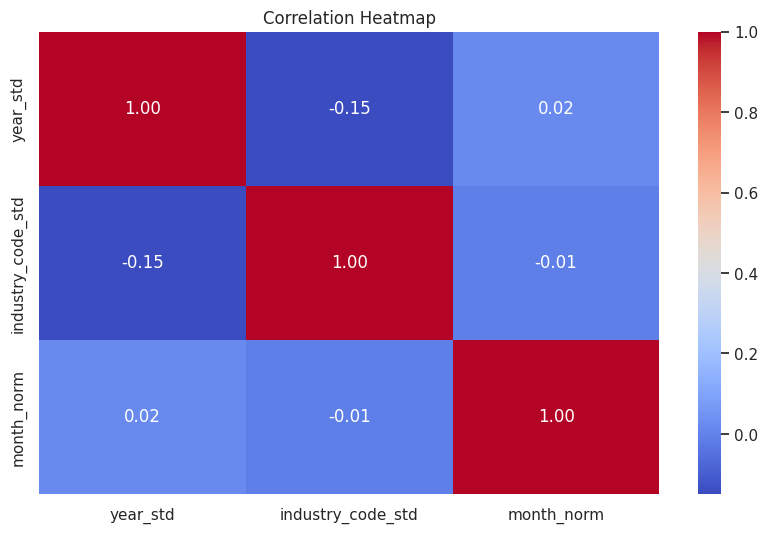

In [19]:
#Heatmap of correlations
correlation_matrix = data[[ 'year_std', 'industry_code_std', 'month_norm']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
#Summary statistics for numerical columns
numerical_summary = data[['year', 'month', 'industry_code', 'year_std', 'industry_code_std', 'month_norm']].describe()
print(numerical_summary)

#Additional statistics
mode_values = data[['year', 'month', 'industry_code']].mode()
print(f"Mode values:\n{mode_values}")


               year         month  industry_code      year_std  \
count  13841.000000  13841.000000   13841.000000  1.384100e+04   
mean    2019.833394      6.419767      63.245286 -4.665423e-15   
std        2.852742      3.475130      18.909945  1.000036e+00   
min     2014.000000      1.000000      11.000000 -2.044911e+00   
25%     2018.000000      3.000000      52.000000 -6.427009e-01   
50%     2020.000000      7.000000      61.000000  5.840433e-02   
75%     2022.000000      9.000000      81.000000  7.595096e-01   
max     2024.000000     12.000000      99.000000  1.460615e+00   

       industry_code_std    month_norm  
count       1.384100e+04  13841.000000  
mean        1.724892e-16      0.492706  
std         1.000036e+00      0.315921  
min        -2.762947e+00      0.000000  
25%        -5.946973e-01      0.181818  
50%        -1.187400e-01      0.545455  
75%         9.389428e-01      0.727273  
max         1.890857e+00      1.000000  
Mode values:
   year  month  industr

In [21]:
#Summary statistics for categorical columns
categorical_columns = ['actor_type', 'industry', 'event_type']
for col in categorical_columns:
    print(f"Summary for {col}:\n{data[col].value_counts()}\n")


Summary for actor_type:
actor_type
Criminal        10523
Hacktivist       1907
Nation-State      790
Undetermined      402
Hobbyist          189
Terrorist          30
Name: count, dtype: int64

Summary for industry:
industry
Public Administration                                                       2616
Health Care and Social Assistance                                           1855
Information                                                                 1414
Finance and Insurance                                                       1315
Educational Services                                                        1311
Professional, Scientific, and Technical Services                            1150
Other Services (except Public Administration)                                936
Manufacturing                                                                632
Retail Trade                                                                 463
Transportation and Warehousing                

<ipython-input-22-e854eb8a7056>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='industry', data=data, order=industry_counts.index, palette='Set1')


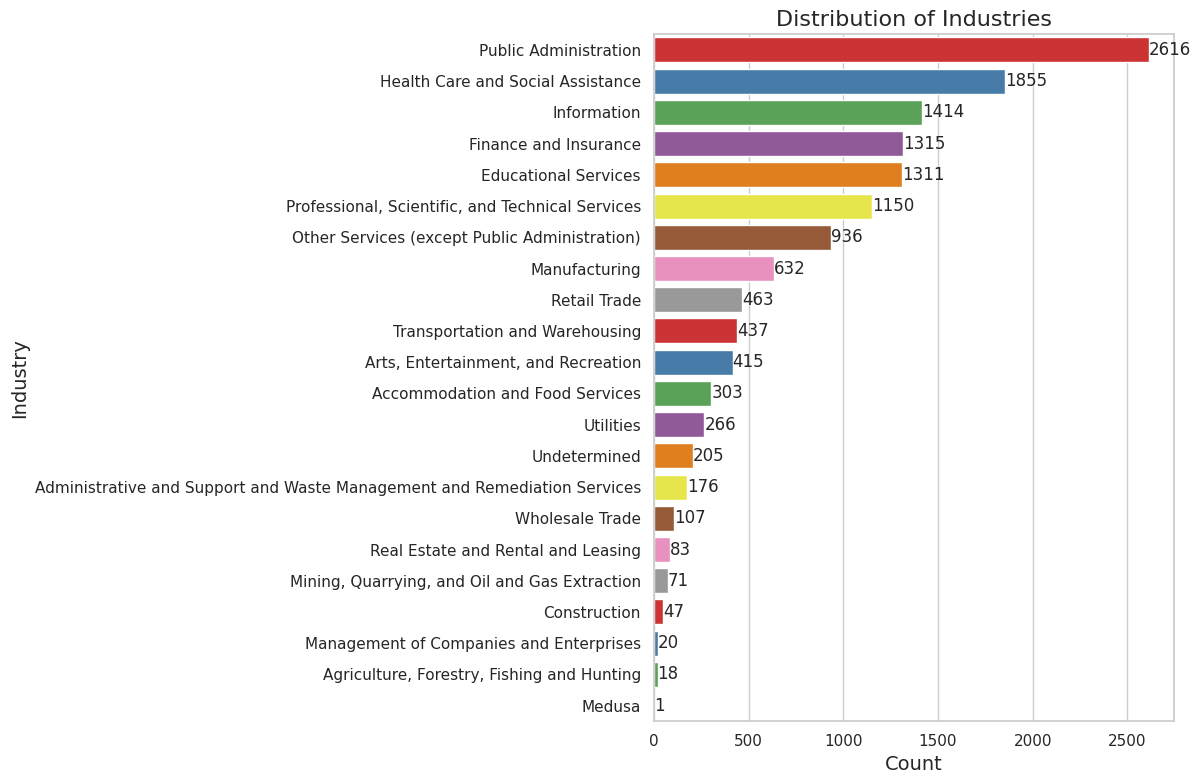

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Plot for Industry
plt.figure(figsize=(12, 8))
industry_counts = data['industry'].value_counts()
sns.countplot(y='industry', data=data, order=industry_counts.index, palette='Set1')
plt.title('Distribution of Industries', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Industry', fontsize=14)

for index, value in enumerate(industry_counts):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()



<ipython-input-23-50f6bd0551e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='event_type', data=data, order=event_type_counts.index, palette='Set2')


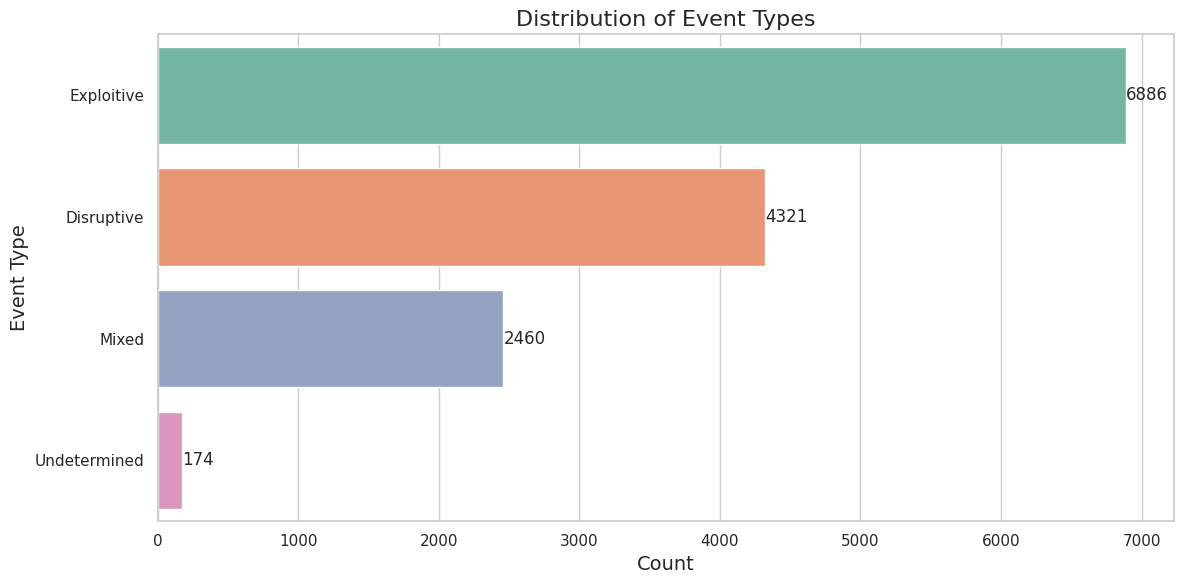

In [23]:
#Plot for Event Type
plt.figure(figsize=(12, 6))
event_type_counts = data['event_type'].value_counts()
sns.countplot(y='event_type', data=data, order=event_type_counts.index, palette='Set2')
plt.title('Distribution of Event Types', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Event Type', fontsize=14)

#Add count labels on bars
for index, value in enumerate(event_type_counts):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-24-6a26d471a5bc>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (event_type_counts[i] / event_type_counts.sum()) * 100


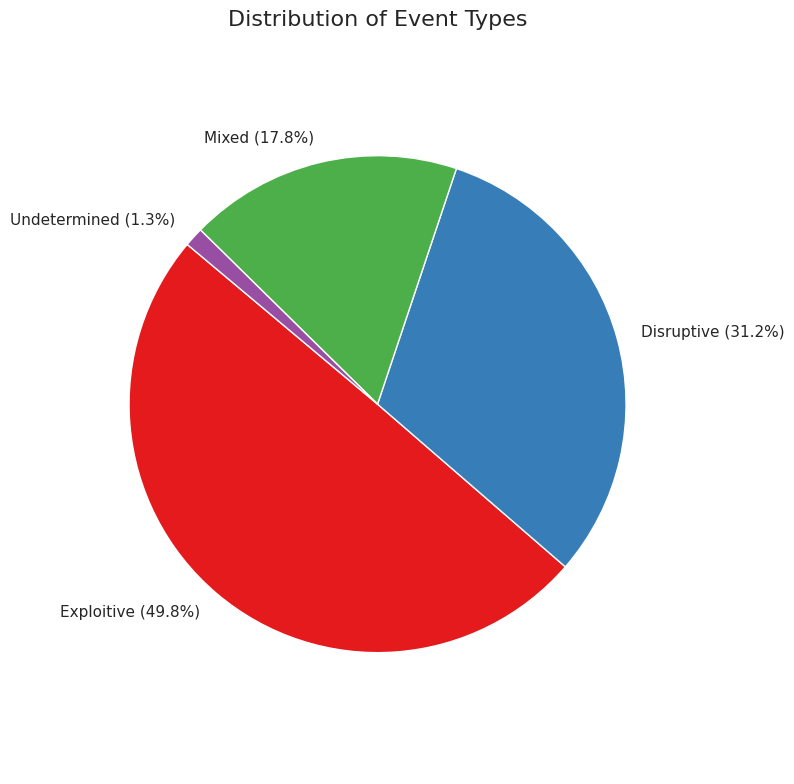

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#calculate the counts of each event type
event_type_counts = data['event_type'].value_counts()

#create a pie chart with Seaborn color palette
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set1', len(event_type_counts))

#create a function to format the label
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{absolute}"

#create a pie chart with custom colors and adjusted percentages
wedges, texts, autotexts = plt.pie(event_type_counts, labels=event_type_counts.index, autopct='', startangle=140, colors=colors)

#format the labels to include percentage in brackets
for i, text in enumerate(texts):
    percentage = (event_type_counts[i] / event_type_counts.sum()) * 100
    text.set_text(f"{text.get_text()} ({percentage:.1f}%)")

plt.title('Distribution of Event Types', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [25]:
print(data['industry'].unique())

['Educational Services' 'Professional, Scientific, and Technical Services'
 'Information' 'Finance and Insurance' 'Public Administration'
 'Other Services (except Public Administration)' 'Utilities'
 'Retail Trade'
 'Administrative and Support and Waste Management and Remediation Services'
 'Manufacturing' 'Agriculture, Forestry, Fishing and Hunting'
 'Arts, Entertainment, and Recreation' 'Transportation and Warehousing'
 'Undetermined' 'Health Care and Social Assistance'
 'Accommodation and Food Services' 'Real Estate and Rental and Leasing'
 'Mining, Quarrying, and Oil and Gas Extraction' 'Wholesale Trade'
 'Management of Companies and Enterprises' 'Construction' 'Medusa']


In [26]:
import pandas as pd
import numpy as np

#Feature engineering
df = data

# Convert 'event_date' to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# --- Feature Engineering ---

# 1. Temporal Features
df['month'] = df['event_date'].dt.month
df['quarter'] = df['event_date'].dt.quarter
df['day_of_week'] = df['event_date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 represent Saturday and Sunday

# 2. Interaction Features
df['actor_x_motive'] = df['actor_type'] + '_' + df['motive']
df['industry_x_event_type'] = df['industry'] + '_' + df['event_type']

# 3. Aggregated Features
sector_event_counts = df['industry'].value_counts()
df['sector_event_ratio'] = df['industry'].map(sector_event_counts) / len(df)
actor_event_counts = df['actor_type'].value_counts()
df['actor_event_count'] = df['actor_type'].map(actor_event_counts)

# 5. Cyclical Features (Assuming 'month' ranges from 1 to 12)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Display the first few rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column name and their data types
print(df.info())

| slug             | event_date          | year   | month   | actor                  | actor_type   | organization         | industry_code   | industry                                         | motive       | event_type   | event_subtype                      | description                                                                                                                                                                                                             | source_url                                                                                                                                   | country                  | actor_country        | year_std   | industry_code_std   | month_norm   | quarter   | day_of_week   | is_weekend   | actor_x_motive            | industry_x_event_type                                       | sector_event_ratio   | actor_event_count   | month_sin   | month_cos   |
|:-----------------|:--------------------|:-------|:--------|:----------

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#encoding Functions
#frequency Encoding Function
def frequency_encode(df, column):
    freq_map = df[column].value_counts() / len(df)
    df[column + '_freq_enc'] = df[column].map(freq_map)

#target Encoding Function
def target_encode(df, feature, target):
    #ensure the target is numeric
    if df[target].dtype == 'object':
        #convert target column to numeric if it's not
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target])

    encoding_map = df.groupby(feature)[target].mean()
    return df[feature].map(encoding_map)

#label Encoding Function
def label_encode(df, column):
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])

#one-hot Encoding Function
def one_hot_encode(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df

#apply Frequency Encoding
for col in ['actor_type', 'industry', 'motive', 'country', 'actor_country']:
    frequency_encode(df, col)

#apply Label Encoding to event_type
label_encode(df, 'event_type')  #apply label encoding

#apply Target Encoding to 'actor_type'
df['actor_type_target_enc'] = target_encode(df, 'actor_type', 'event_type_encoded')

#create Interaction Terms
df['actor_x_motive'] = df['actor_type'].astype(str) + "_" + df['motive'].astype(str)
df['industry_x_event_type'] = df['industry'].astype(str) + "_" + df['event_type'].astype(str)

#one-hot Encode interaction terms
df = pd.get_dummies(df, columns=['actor_x_motive', 'industry_x_event_type'], prefix=['actor_motive', 'industry_event'])



In [28]:
import pandas as pd

duplicated_columns = df.columns[df.columns.duplicated()]
print(duplicated_columns)

Index([], dtype='object')


In [29]:
df = df.loc[:,~df.columns.duplicated()]

In [30]:
print(list(df.columns))


['slug', 'event_date', 'year', 'month', 'actor', 'actor_type', 'organization', 'industry_code', 'industry', 'motive', 'event_type', 'event_subtype', 'description', 'source_url', 'country', 'actor_country', 'year_std', 'industry_code_std', 'month_norm', 'quarter', 'day_of_week', 'is_weekend', 'sector_event_ratio', 'actor_event_count', 'month_sin', 'month_cos', 'actor_type_freq_enc', 'industry_freq_enc', 'motive_freq_enc', 'country_freq_enc', 'actor_country_freq_enc', 'event_type_encoded', 'actor_type_target_enc', 'actor_motive_Criminal_Financial', 'actor_motive_Criminal_Industrial-Espionage', 'actor_motive_Criminal_Personal Attack', 'actor_motive_Criminal_Political-Espionage', 'actor_motive_Criminal_Protest', 'actor_motive_Criminal_Sabotage', 'actor_motive_Criminal_Undetermined', 'actor_motive_Hacktivist_Financial', 'actor_motive_Hacktivist_Personal Attack', 'actor_motive_Hacktivist_Political-Espionage', 'actor_motive_Hacktivist_Protest', 'actor_motive_Hacktivist_Protest,Financial', 'ac

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



#select features and target variable
X = df[['actor_type_freq_enc', 'industry_freq_enc', 'motive_freq_enc',
        'country_freq_enc', 'actor_country_freq_enc', 'year_std',
        'industry_code_std', 'month_norm', 'day_of_week',
        'month_sin', 'month_cos', 'actor_type_target_enc']]

y = df['event_type_encoded']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#initialize the XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=len(df['event_type'].unique()), random_state=42)

#train the model
model.fit(X_train, y_train)

#make predictions on the test set
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7168652943300831
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       886
           1       0.73      0.82      0.77      1391
           2       0.63      0.61      0.62       457
           3       0.40      0.17      0.24        35

    accuracy                           0.72      2769
   macro avg       0.63      0.56      0.58      2769
weighted avg       0.72      0.72      0.71      2769



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Confusion Matrix:
[[ 558  264   61    3]
 [ 153 1143   90    5]
 [  28  150  278    1]
 [   5   15    9    6]]


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



#get the unique years in the original dataset (for historical data)
historical_years = df['year_std'].unique()

#generate future years (2025 to 2029)
future_years = np.arange(2025, 2030)

#create an empty list to store the future data for prediction
future_data = []

#loop through the future years and predict for each unique industry
for year in future_years:
    for industry in df['industry'].unique():
        #find records for the last available year and the current industry
        historical_record = df[(df['year_std'] == historical_years[-1]) & (df['industry'] == industry)]

        #check if historical records exist for this combination of year and industry
        if not historical_record.empty:
            #take the first record if available
            historical_record = historical_record.iloc[0]

            #create a new row for future data, adjusting only the 'year_std' column
            future_row = historical_record.copy()
            future_row['year_std'] = year

            #append the row for prediction
            future_data.append(future_row)

#convert the list of future data to a DataFrame
future_df = pd.DataFrame(future_data)

#step 1: Scale the data using the same scaler that was used during training
scaled_future_data = scaler.transform(future_df[['actor_type_freq_enc', 'industry_freq_enc', 'motive_freq_enc',
                                                 'country_freq_enc', 'actor_country_freq_enc', 'year_std',
                                                 'industry_code_std', 'month_norm', 'day_of_week',
                                                 'month_sin',
                                                 'month_cos', 'actor_type_target_enc']])

#Step 2: Use the trained XGBoost model to predict the event types for future data
future_predictions = model.predict(scaled_future_data)

#Mapping the predictions to event type labels
event_type_mapping = {0: 'Disruptive', 1: 'Exploitive', 2: 'Mixed', 3: 'Undetermined'}

#Add the predicted event types to the future DataFrame
future_df['predicted_event_type'] = future_predictions
future_df['predicted_event_type'] = future_df['predicted_event_type'].map(event_type_mapping)


#Step 3: Store the forecasted trends in a DataFrame for each industry over the next 5 years
result_df = future_df[['year_std', 'industry', 'predicted_event_type']]
result_df


,year_std,industry,predicted_event_type
13546,2025,Educational Services,Disruptive
13481,2025,"Professional, Scientific, and Technical Services",Exploitive
13477,2025,Information,Disruptive
13485,2025,Finance and Insurance,Exploitive
13478,2025,Public Administration,Exploitive
...,...,...,...
13561,2029,Accommodation and Food Services,Disruptive
13498,2029,Real Estate and Rental and Leasing,Disruptive
13512,2029,"Mining, Quarrying, and Oil and Gas Extraction",Disruptive
13524,2029,Wholesale Trade,Mixed


<ipython-input-34-91f989346d60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['predicted_event_type_encoded'] = result_df['predicted_event_type'].map(event_type_mapping)


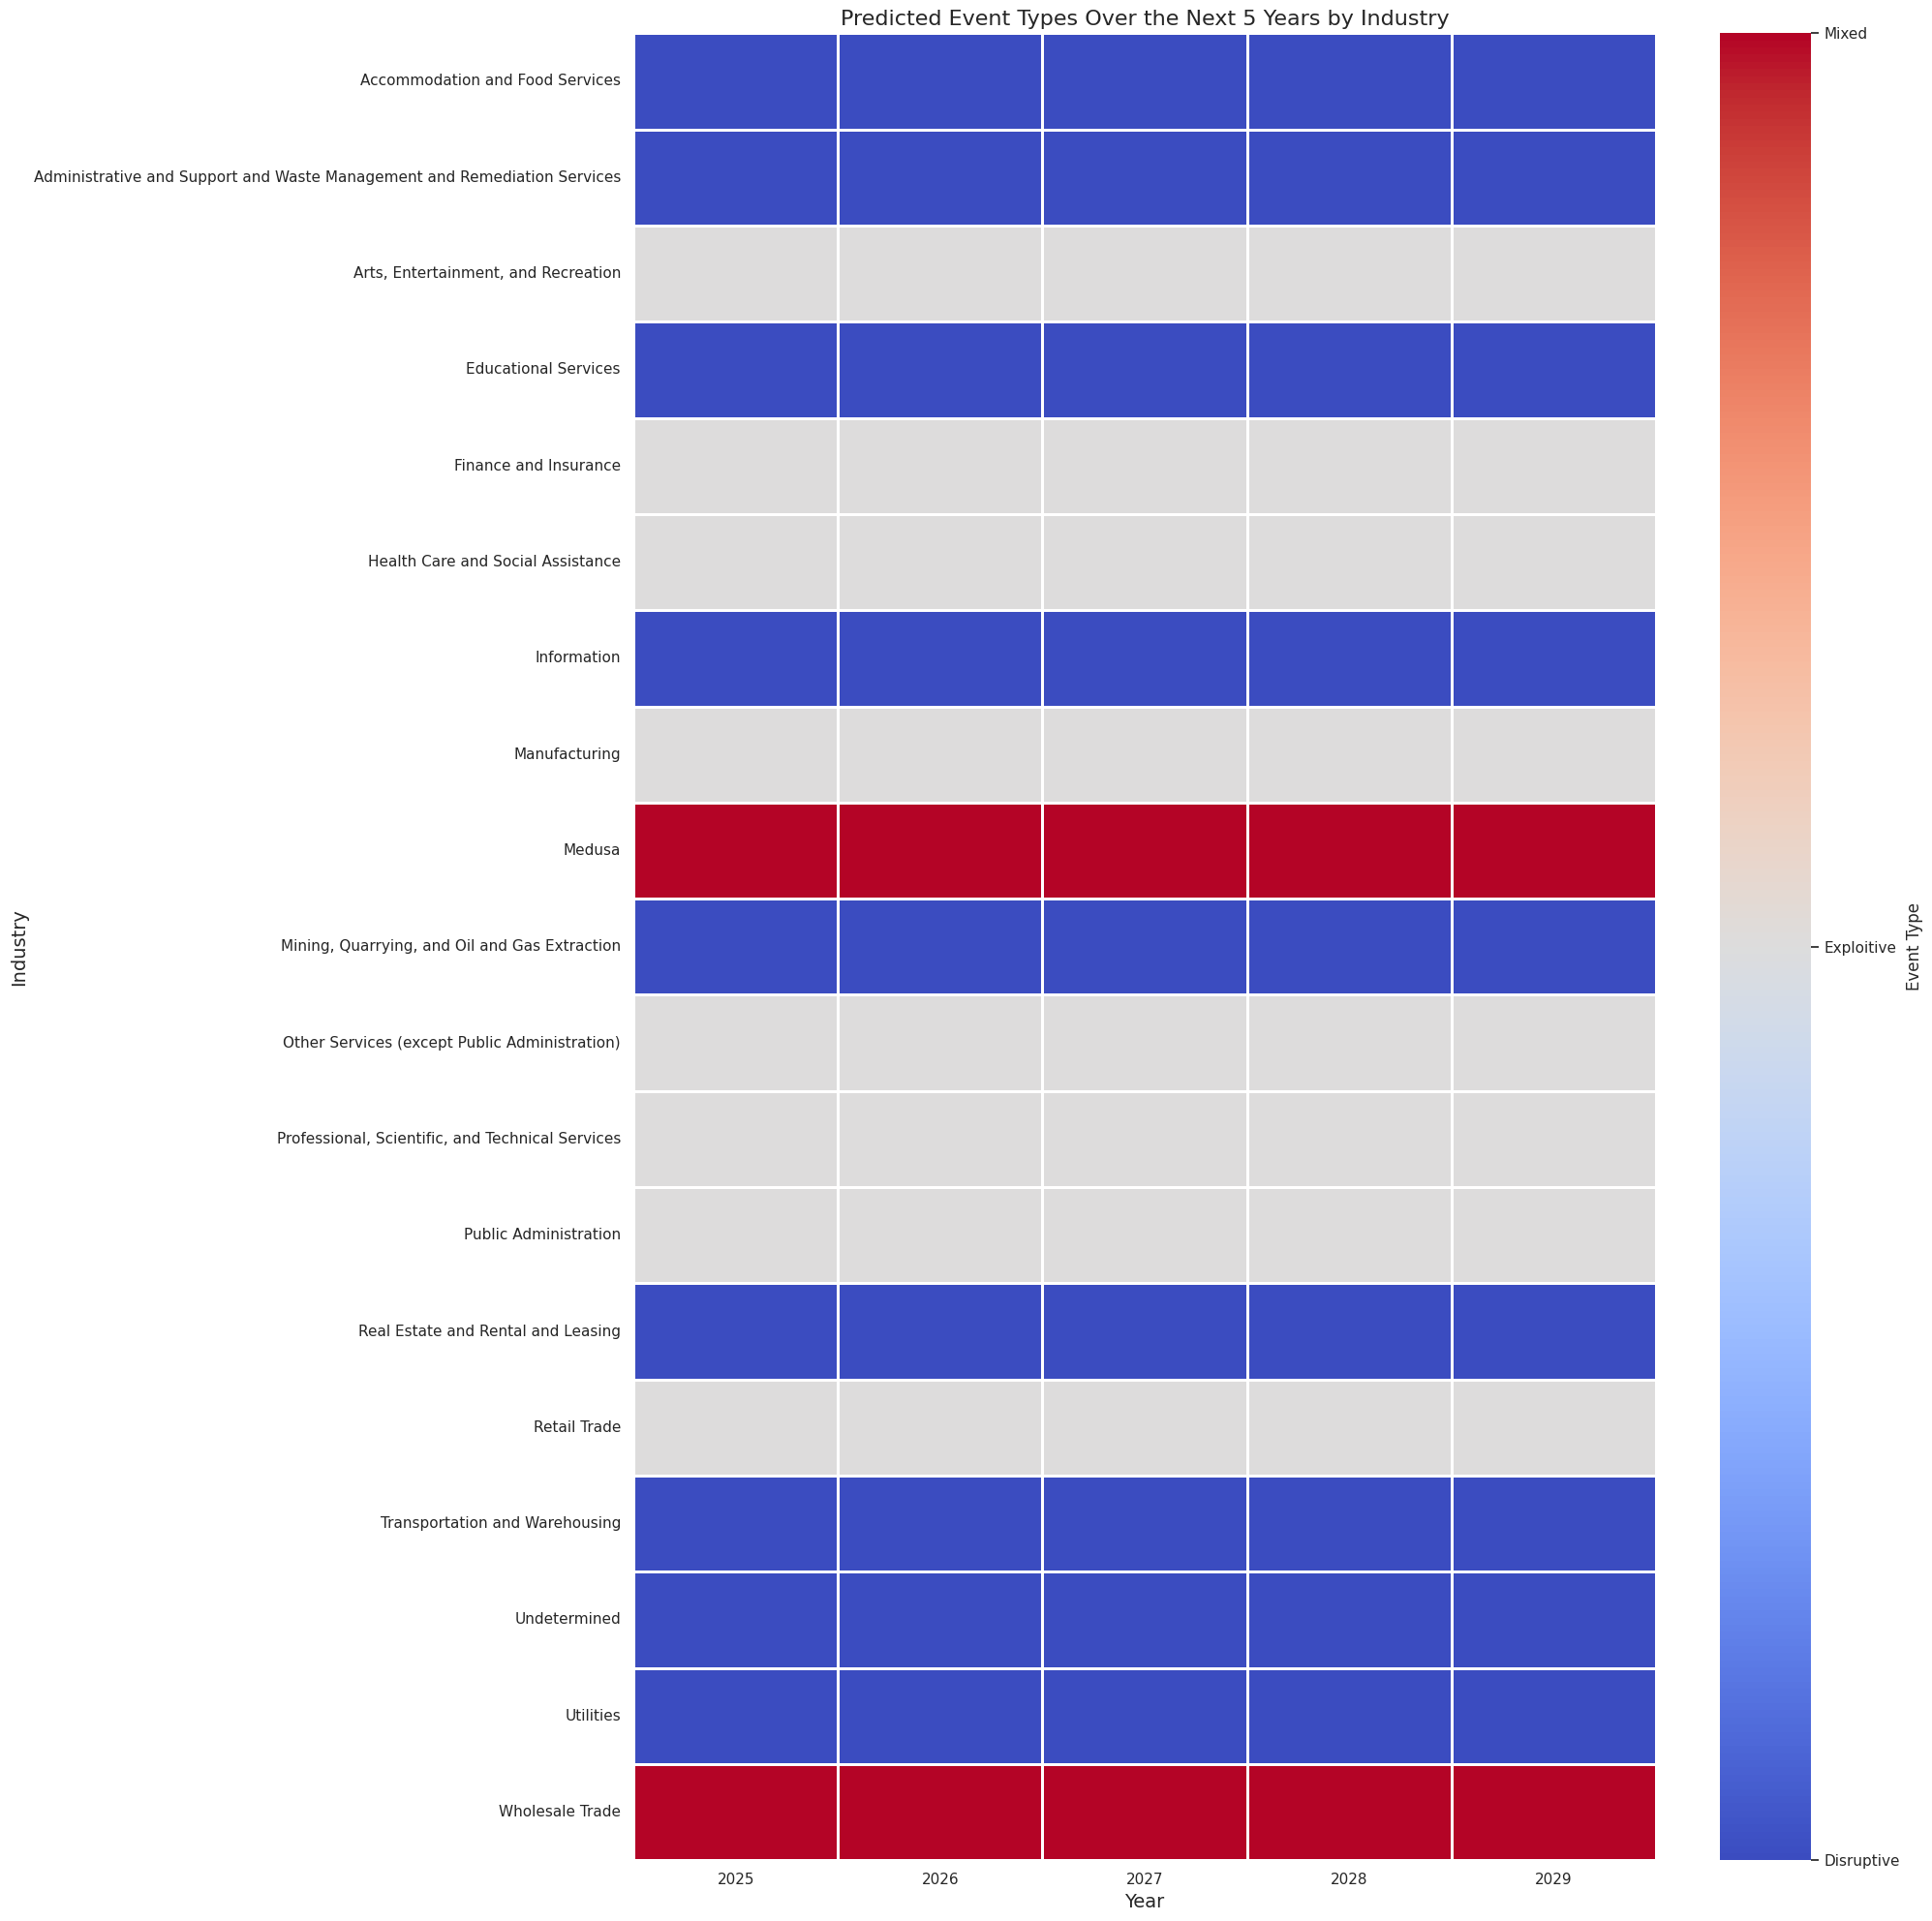

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

#Create a mapping of event types to numbers
event_type_mapping = {'Disruptive': 0, 'Exploitive': 1, 'Mixed': 2, 'Undetermined': 3}

#Map the event types to numbers
result_df['predicted_event_type_encoded'] = result_df['predicted_event_type'].map(event_type_mapping)

#Pivot the result_df to have 'industry' as rows and 'year_std' as columns
heatmap_data = result_df.pivot(index='industry', columns='year_std', values='predicted_event_type_encoded')

#Create a custom color map for event types
cmap = sns.color_palette("coolwarm", as_cmap=True)

#Create a heatmap without numbers inside the grid
plt.figure(figsize=(20, 20))
sns.heatmap(
    heatmap_data,
    annot=False,
    cmap=cmap,
    cbar_kws={'label': 'Event Type', 'ticks': [0, 1, 2, 3]},
    linewidths=1,
    linecolor='white',
    square=False

)

#Manually add a legend for the event types
cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Disruptive', 'Exploitive', 'Mixed'])

#Add labels and title
plt.title('Predicted Event Types Over the Next 5 Years by Industry', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.tight_layout()

#Show the heatmap
plt.show()


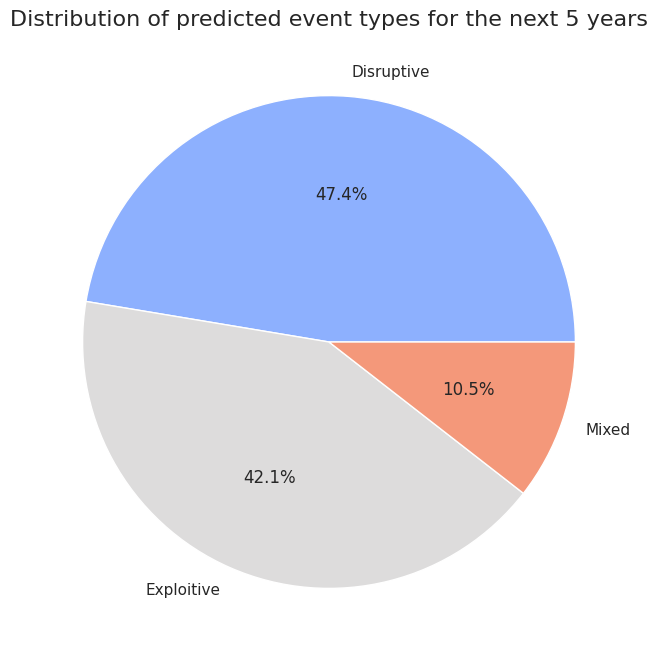

In [35]:
import matplotlib.pyplot as plt

#Calculate the distribution of predicted_event_type
event_type_distribution = result_df['predicted_event_type'].value_counts()

#Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(event_type_distribution, labels=event_type_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(event_type_distribution)))
plt.title('Distribution of predicted event types for the next 5 years', fontsize=16)

#Show the pie chart
plt.show()


The end
